### **Load Data**

In [1]:
import pandas as pd

# Function to load data from csv file 
def load_data(df):
    return pd.read_csv(file_path)

file_path='../data/flight_df.csv' # The period indicates how many levels (from root, go out of notebooks and then go in data)

# Load the dataset
df=load_data(file_path)
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


### **Model Validation**

In [4]:
from sklearn.model_selection import train_test_split 

# Define target and features 
y=df['satisfied']
x=df.drop(columns='satisfied')

# Split the dataset intro train and tests sets
X_train, X_test, y_train, y_test=train_test_split (x,y, test_size=0.2, random_state=42)

# Check for the class imbalance
y.value_counts(normalize=True)

satisfied
0    0.56695
1    0.43305
Name: proportion, dtype: float64

### **PreProcessing**

In [5]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# Create preprocessing pipeline
def create_preprocessing_pipeline():

    # Select numeric and categorical columns
    num_cols=make_column_selector(dtype_include='number')
    cat_cols=make_column_selector(dtype_include='object')

    # Instatiate the transformers
    scaler=StandardScaler()
    ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    knn_imputer=KNNImputer(n_neighbors=2, weights='uniform')

    # Create the pipeline
    num_pipe=Pipeline([
        ('imputer', knn_imputer),
        ('scaler', scaler)
    ])

    cat_pipe=Pipeline([
        ('encoder', ohe)
    ])

    preprocessor=ColumnTransformer([
        ('numeric', num_pipe, num_cols),
        ('categorical', cat_pipe, cat_cols)
    ])

    return preprocessor

# Create preprocessor object
preprocessor=create_preprocessing_pipeline()

In [9]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Create sampler pipeline
def make_sampler_pipeline(sampler):
    return ImbPipeline([
        ('sampler', sampler)
    ]) 

# Preprocess and rebalance data 
def preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train):

    # Transform training data into fitted transformer
    X_train_transformed=preprocessor.fit_transform(X_train)
    X_test_tranformed=preprocessor.transform(X_test)

    # Create sampling pipeline
    sampler=make_sampler_pipeline(SMOTE(random_state=42))

    # Balance training data
    X_train_balanced, y_train_balanced=sampler.fit_resample(X_train_transformed, y_train)

    return X_train_balanced, X_test_tranformed, y_train_balanced

# Preprocess and rebalance the data
X_train_balanced, X_test_tranformed, y_train_balanced=preprocess_and_rebalance_data(preprocessor, X_train, X_test, y_train)

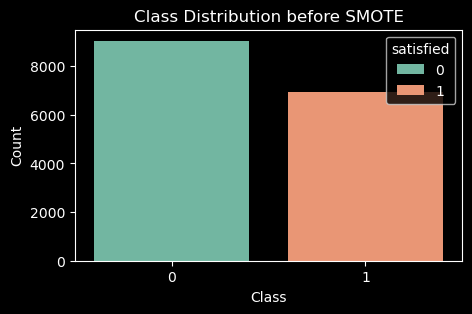

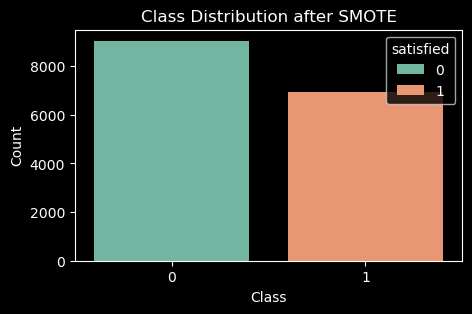

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# format all figures in dark mode
plt.style.use('dark_background')

# Visualize the data before and after SMOTE
def plot_class_distribution(y, title):
    plt.figure(figsize=(5,3))
    sns.countplot(x=y, palette='Set2', hue=y),
    plt.title(title),
    plt.xlabel('Class'),
    plt.ylabel('Count'),
    plt.show()

# Before SMOTE
plot_class_distribution(y_train, title='Class Distribution before SMOTE')

# After SMOTE
plot_class_distribution(y_train, title='Class Distribution after SMOTE')

**Class Distribution Before SMOTE**

- **Description:** 
  - Displays an imbalance between classes.
  - One class has significantly more samples than the other, which can affect model performance by biasing predictions toward the majority class.

**Class Distribution After SMOTE**

- **Description:**
  - Shows a more balanced distribution between classes.
  - SMOTE generates synthetic examples for the minority class to match the number of samples in the majority class, aiming to improve model performance by eliminating bias.

**Implications**

- **Before SMOTE:**
  - Models might struggle to predict the minority class accurately due to skewed data.

- **After SMOTE:**
  - Aims to improve classification performance by providing a balanced dataset, helping the model learn equally from both classes.

Balancing the class distribution with SMOTE can lead to better generalization and more reliable predictions.